In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
X_test = images[9690:11990]
y_test = masks[9690:11990]

In [4]:
images = images[:9690]
masks = masks[:9690]

In [5]:
images.shape

(9690, 512, 512, 1)

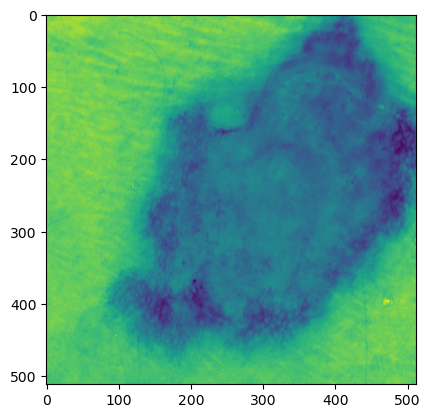

In [6]:
imshow(images[100])

In [7]:
masks.shape

(9690, 512, 512, 1)

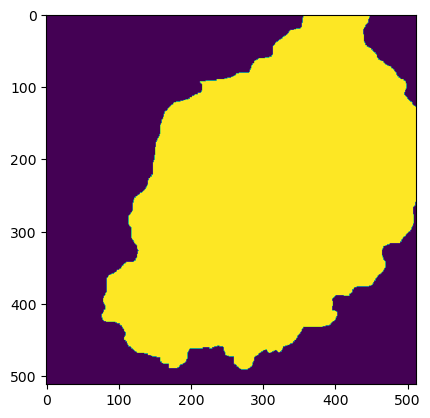

In [8]:
imshow(masks[100])

In [9]:
import sys
sys.path.append('../')
import gp2

In [10]:
from keras import losses

In [11]:
loss_fx = losses.BCE

In [12]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmp13gi8le1kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmplo1yxw0akuc_unet2d


In [13]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmplo1yxw0akuc_unet2d
Verbose mode active!


In [14]:
R.classifier = C ### use custom classifier

In [15]:
R.run(images, masks, runs=3, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unet2d_0kuc_unet2d_model_3_3_test.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
31/31 [==============================] - 33s 737ms/step - loss: 0.1201 - dice_coeff: 0.8765 - val_loss: 0.1213 - val_dice_coeff: 0.8753
Epoch 2/100
31/31 [==============================] - 15s 483ms/step - loss: 0.0935 - dice_coeff: 0.9018 - val_loss: 0.1172 - val_dice_coeff: 0.8917
Epoch 3/100
31/31 [==============================] - 15s 484ms/step - loss: 0.0812 - dice_coeff: 0.9172 - val_loss: 0.1346 - val_dice_coeff: 0.8880
Epoch 4/100
31/31 [==============================] - 15s 480ms/step - loss: 0.0798 - dice_coeff: 0.9189 - val_loss: 0.1249 - val_dice_coeff: 0.8953
Epoch 5/100
31/31 [==============================] - 15s 481ms/step - loss: 0.0717 - dice_coeff: 0.9257 - val_loss: 0.1291 - val_dice_coeff: 0.8999
Epoch 6/100
31/31 [==============================] - 15s 483ms/step - loss: 0.0631 - dice_coeff: 0.9325 - val_loss: 0.1397 - val_dice_coeff: 0.9038
Epoch 7/100
31/31 [==============================] - 15s 481ms/step 

In [16]:
R.classifier_scores # after 5 runs of GP2

[[0.18697866797447205, 0.9034803509712219],
 [0.18616251647472382, 0.8700190782546997],
 [0.23263424634933472, 0.9035584330558777]]

In [17]:
R.discriminator_scores # after 5 runs of GP2

[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]

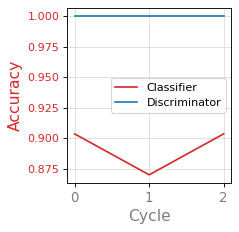

In [18]:
R.plot() # after 5 runs of GP2

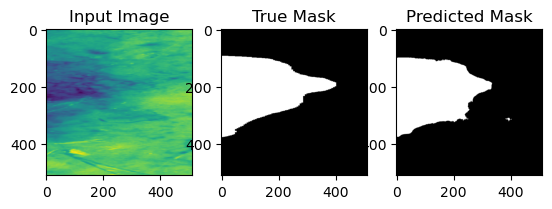

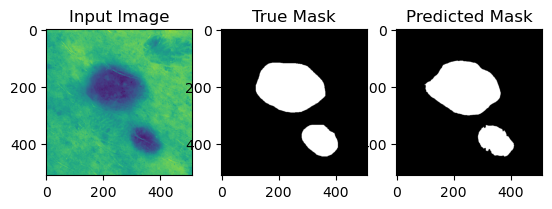

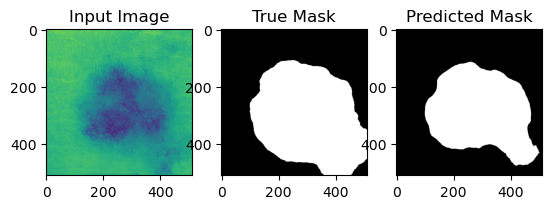

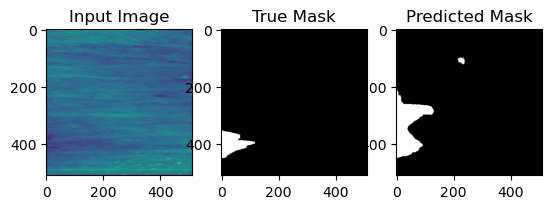

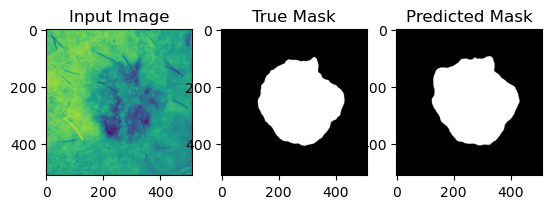

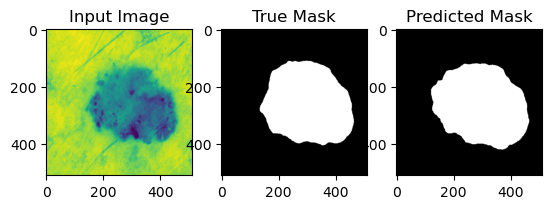

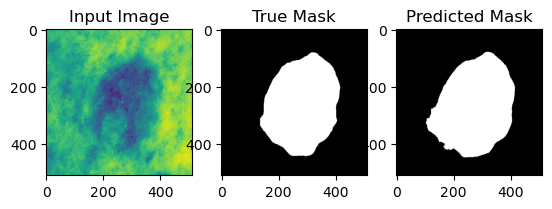

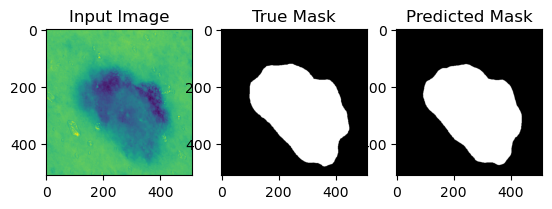

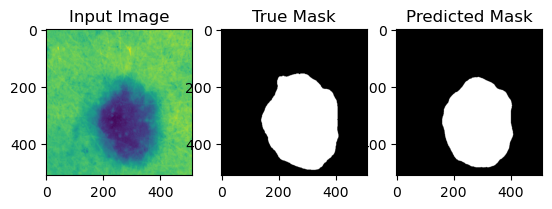

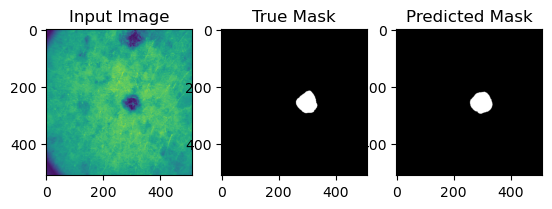

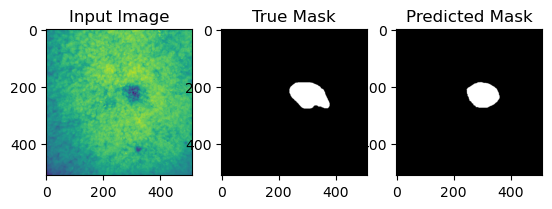

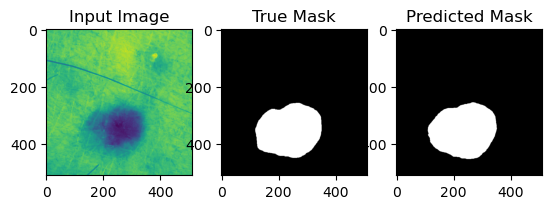

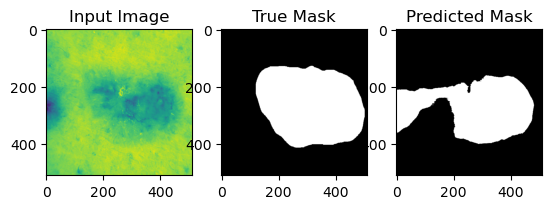

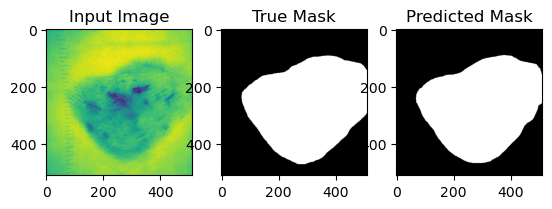

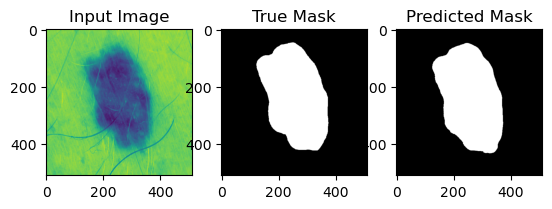

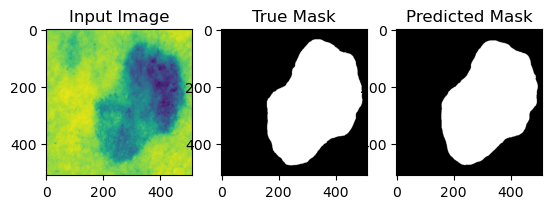

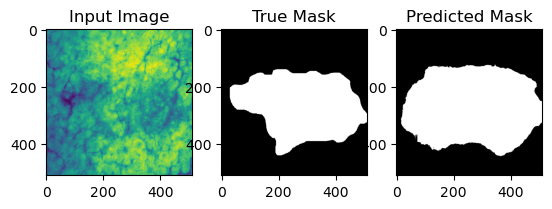

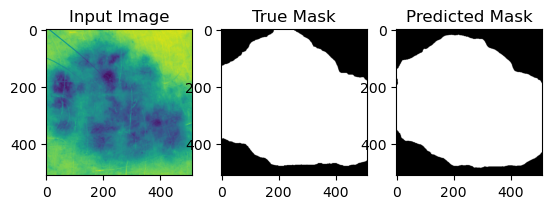

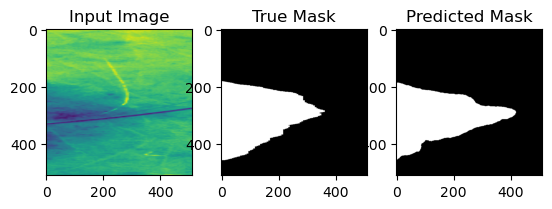

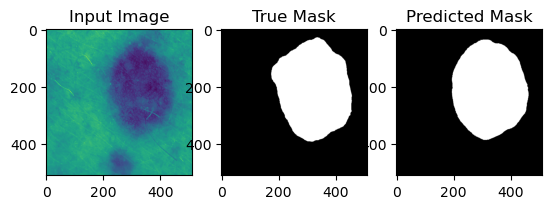

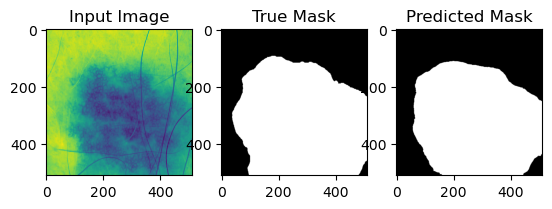

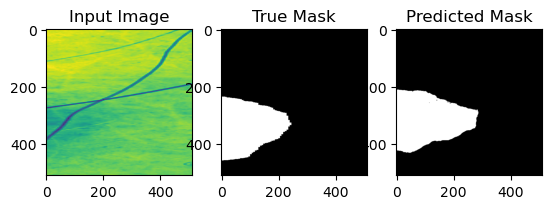

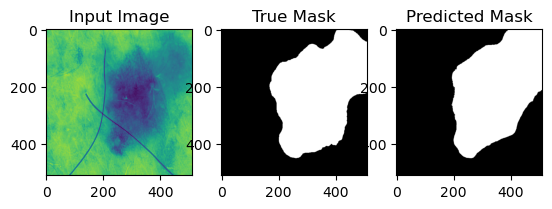

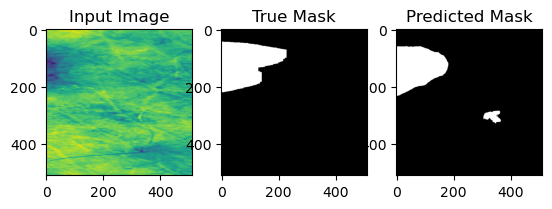

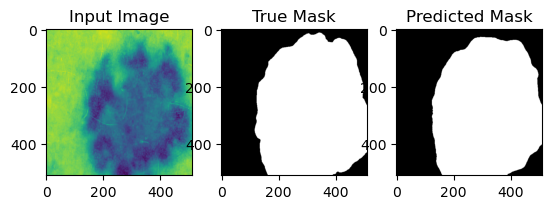

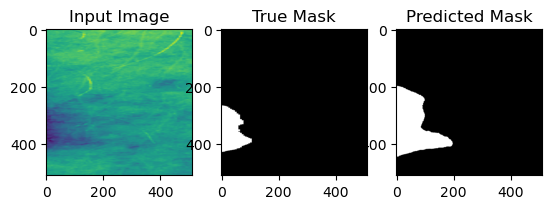

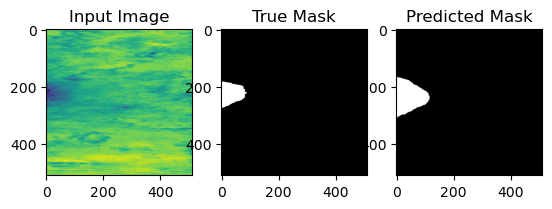

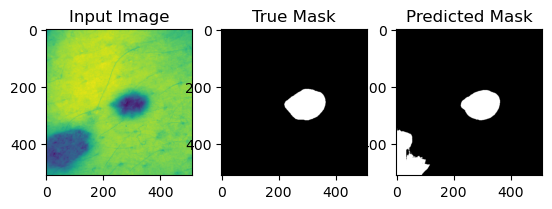

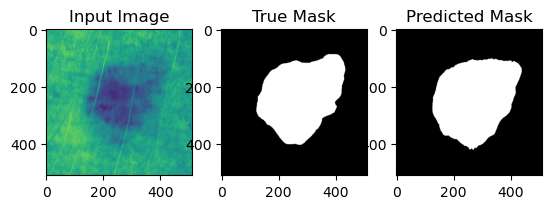

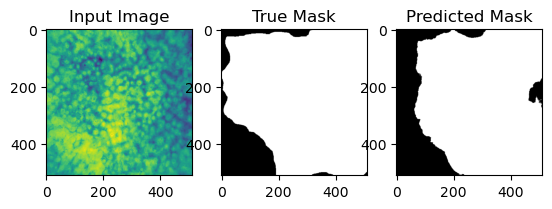

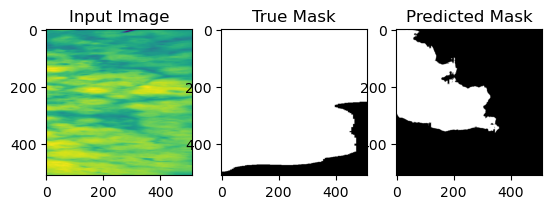

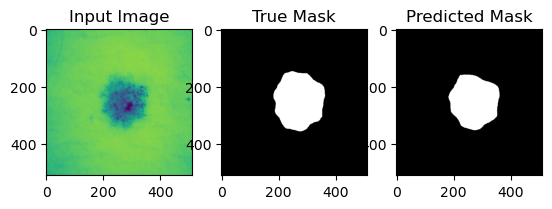

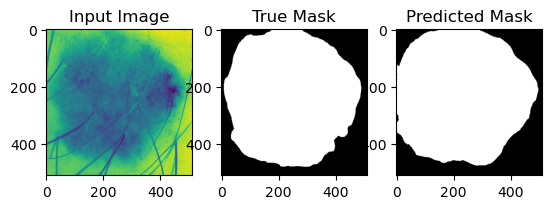

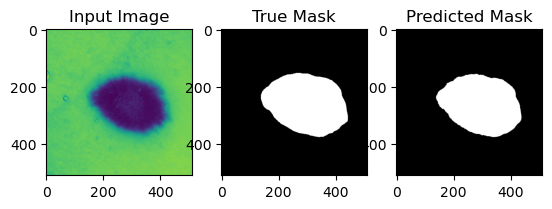

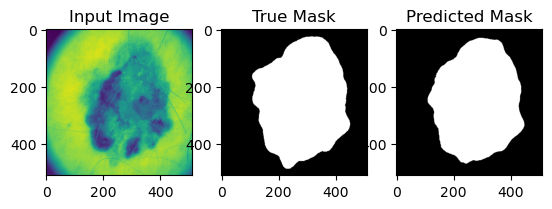

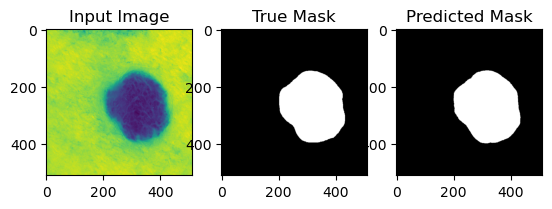

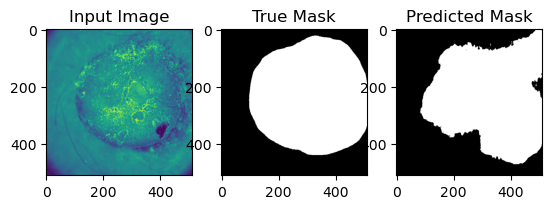

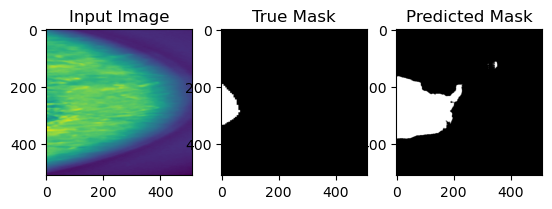

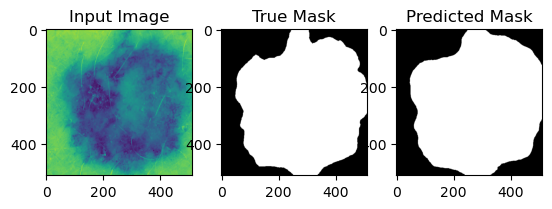

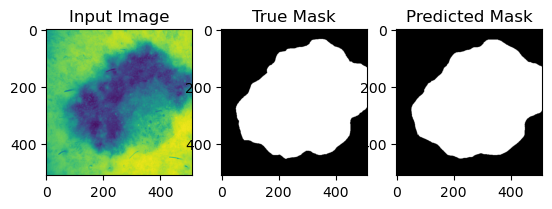

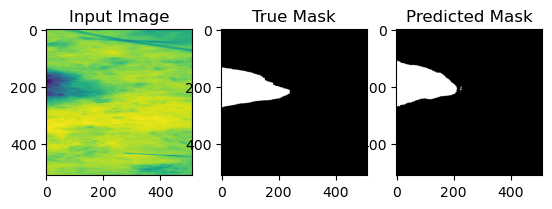

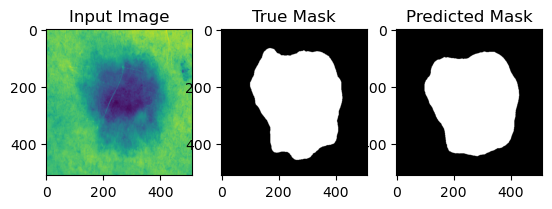

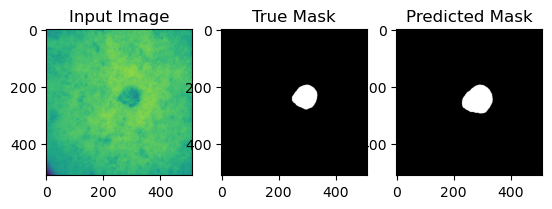

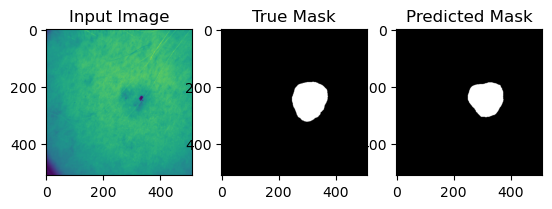

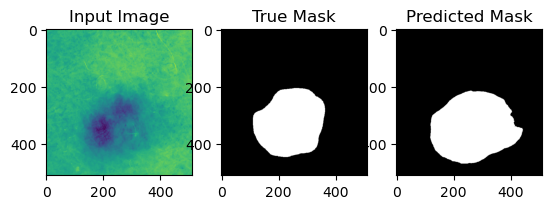

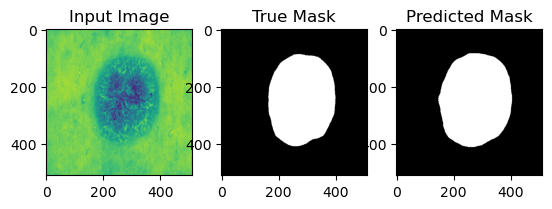

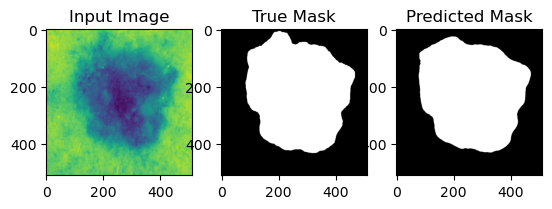

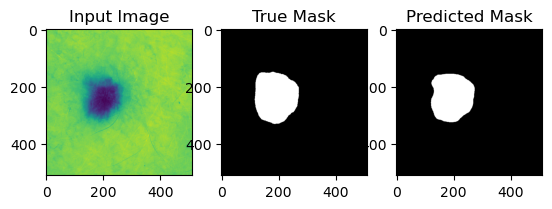

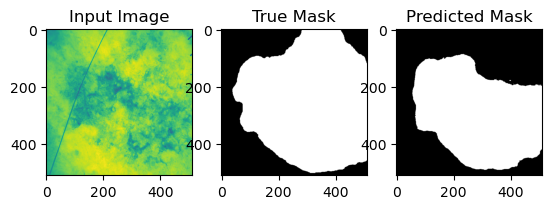

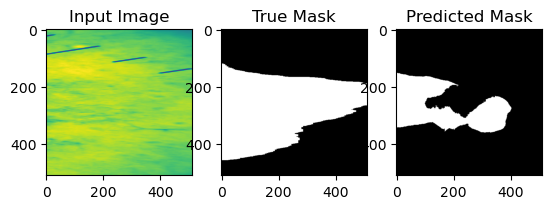

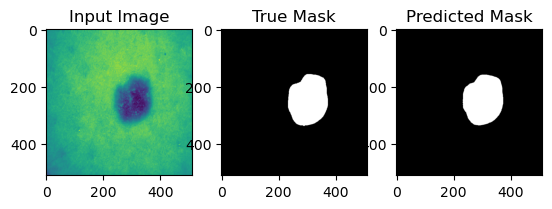

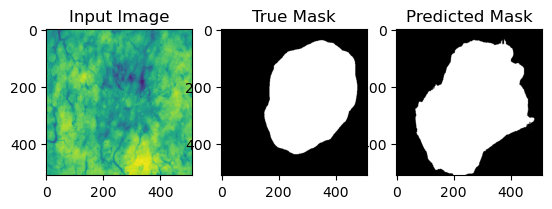

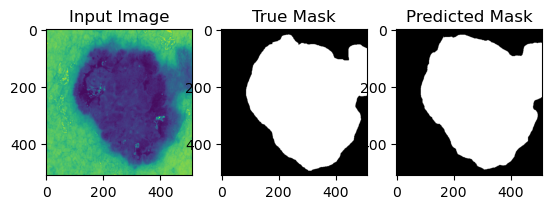

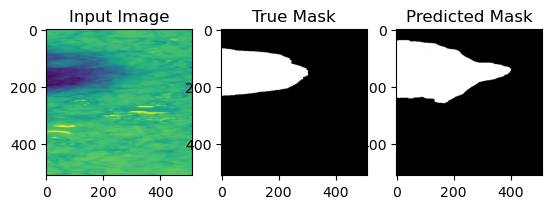

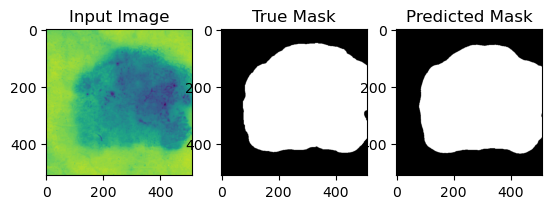

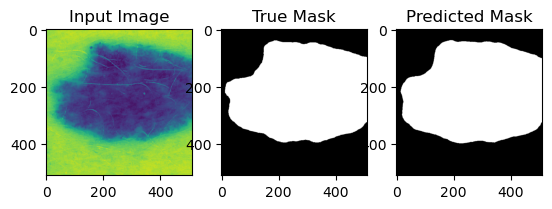

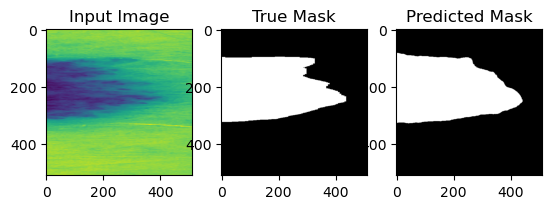

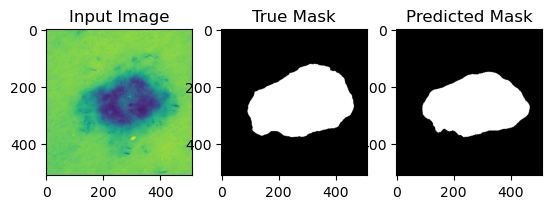

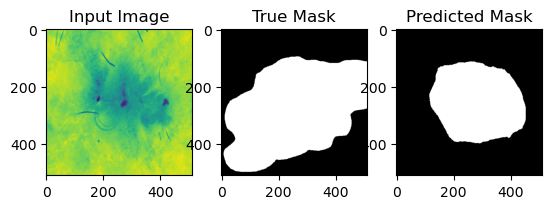

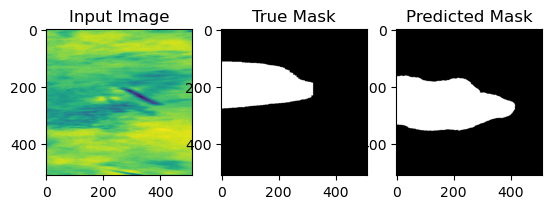

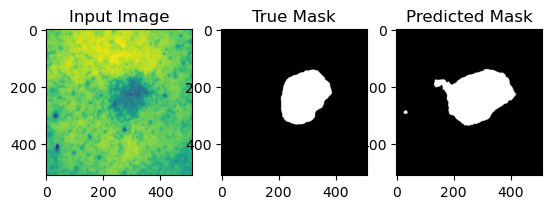

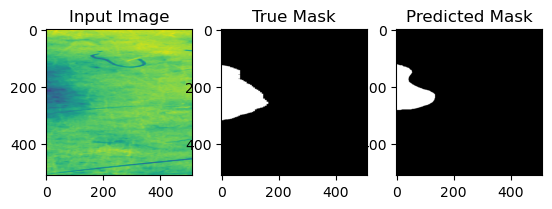

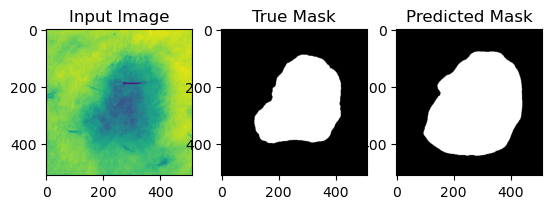

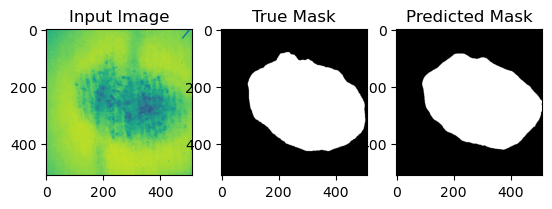

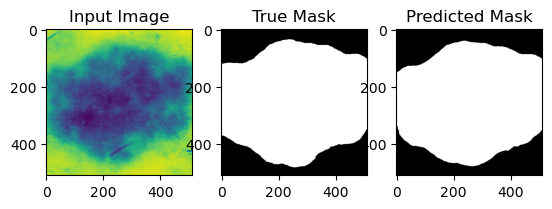

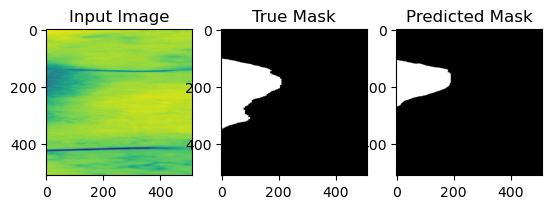

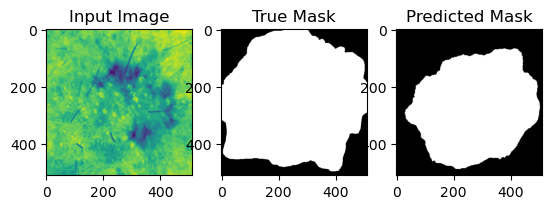

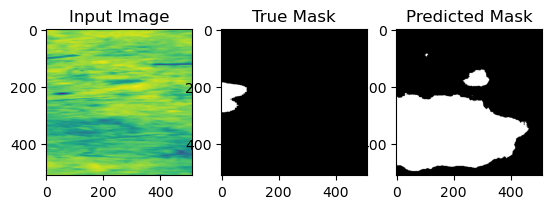

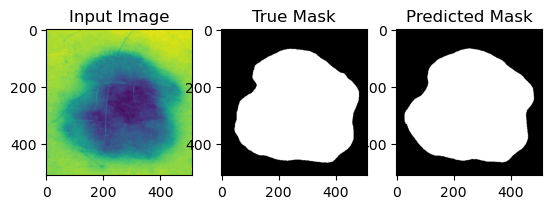

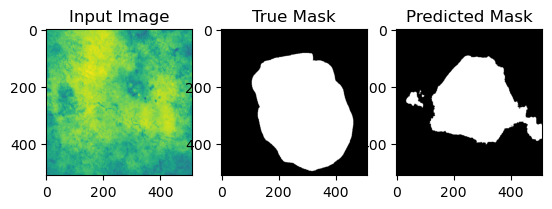

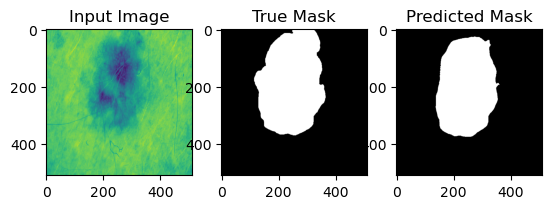

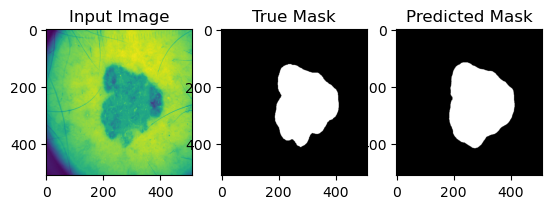

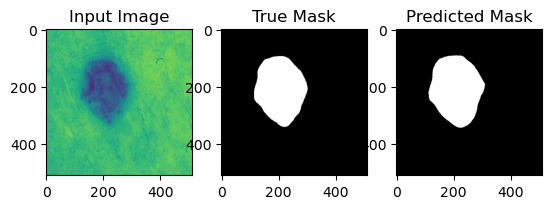

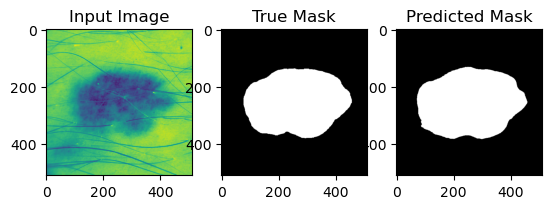

In [20]:
gp2.Util.visualize_predictions(C, X_test, y_test, num_samples=100) # after 5 runs of GP2

In [21]:
y_pred = R.classifier.predict(X_test, y_test)

In [23]:
y_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [25]:
BareBone = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmp13gi8le1kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmplo1yxw0akuc_unet2d


In [26]:
y_pred_bb = BareBone.predict(X_test, y_test)

In [27]:
y_pred_bb

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [31]:
BareBone.model.metrics_names

['loss', 'dice_coeff']

In [30]:
R.classifier.model.metrics_names

['loss', 'dice_coeff']